## Problem Statement 2:
Identify the level of income qualification needed for the families in Latin America.

Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.
Following actions should be performed:


Identify the output variable.

Understand the type of data.

Check if there are any biases in your dataset.

Check whether all members of the house have the same poverty level.

Check if there is a house without a family head.

Set poverty level of the members and the head of the house within a family.

Count how many null values are existing in columns.

Remove null value rows of the target variable.

Predict the accuracy using random forest classifier.

Check the accuracy using random forest with cross validation.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import model_selection

In [2]:
Train_income= pd.read_csv('Train.csv')
Train_income.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
Test_income =pd.read_csv("Test.csv")
Test_income.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


### let us find the shape, column,description of the train and test data

In [4]:
print("the train dataset is {}".format(Train_income.shape))

the train dataset is (9557, 143)


In [5]:
print("The test dataset is{}".format(Test_income.shape))

The test dataset is(23856, 142)


In [6]:
Train_income.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [7]:
Test_income.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=142)

### Identify the output variable.

In [8]:
Train_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [9]:
for i in Train_income.columns:
    if i not in Test_income.columns:
        print("Our Target variable is {}".format(i))

Our Target variable is Target


## Understand the type of data.

In [10]:
Train_income.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

we can see from above it is not clear how many datatypes. let us count the number of exaclty datatypes.


In [11]:
Train_income.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

From above we can see that total 130 columns are int64 types, 8 columns float64 types and 5 columns are string form. list these columns with different datatypes.

In [12]:
print("Integer type:",Train_income.select_dtypes(np.int64).columns)
      
print('\n')

print('Float Type:', Train_income.select_dtypes(np.float64).columns)
print('\n')
print('Object Type:',Train_income.select_dtypes(np.object).columns)


Integer type: Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


in the above we can see the categorical data.  
ID =unique ID.

idhogar= household level identifier.

dependency= Dependency rate, calculated = (number of members of the household
younger than 19 or older than 64)/(number of member of household between 19 and 64).

edjefe= years of education of male head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0.

edjefa= years of education of female head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0.

In the above column we can see that ID has no impact on income qualification and also with the idhogar, hence we will drop these columns

In [13]:
print("Before dropping the columns", Train_income.shape)
Train_income =Train_income.drop(['Id'], axis=1)
print("After dropping the columns", Train_income.shape)

Before dropping the columns (9557, 143)
After dropping the columns (9557, 142)


### Count How Many Null Values re existing in Columns.

In [14]:
Train_income.isna().sum()

v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 142, dtype: int64

lets split to get the null values according to int64, float64,object types.

In [15]:
# check the null values in int64 type data.
null_counts =Train_income.select_dtypes('int64').isnull().sum()

null_counts[null_counts>0]

Series([], dtype: int64)

In [16]:
# check the null values in object datatypes.
null_counts =Train_income.select_dtypes('object').isnull().sum()
null_counts

idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64

In [17]:
# check the null values in float type data.
null_counts =Train_income.select_dtypes('float64').isnull().sum()
null_counts

v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

we have seen that v2a1,v18q1,rez_esc,meaneduc,SQBmeaned has null values.

v2a1= Monthly rent payment.

v18q1= number of tablets household owns.

rez_esc= Years behind in school.

meaneduc= average years of education for adults (18+).

SQBmeaned=  square of the mean years of education of adults (>=18) in the
household. 

Lets fill with 0 value.
Lets look at v2a1 (total nulls: 6860) : Monthly rent payment

why the null values, Lets look at few rows with nulls in v2a1:

### Columns related to Monthly rent payment
tipovivi1, =1 own and fully paid house
tipovivi2, "=1 own, paying in installments"
tipovivi3, =1 rented
tipovivi4, =1 precarious
tipovivi5, "=1 other(assigned, borrowed)"

In [18]:
data =Train_income[Train_income['v2a1'].isnull()].head()
column=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[column]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


## let us plot the status for household that missing the payment (Nan Values)

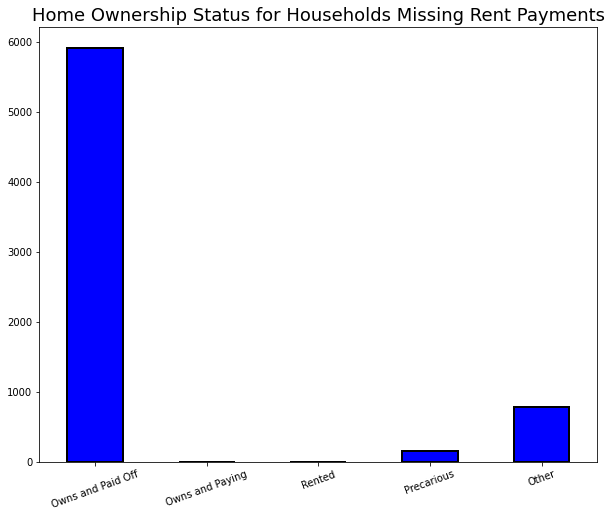

In [19]:

variable =[x for x in Train_income if x.startswith('tipo')]


# Plot of the home ownership variables for home missing rent payments
Train_income.loc[Train_income['v2a1'].isnull(),variable].sum().plot.bar(figsize=(10,8),
                                                                       color='blue',edgecolor='k',linewidth=2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 20)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

we can clearly see  that when the house is fully paid, there will be no monthly rent payment.
Lets add 0 for all the null values. recheck the graph for any changes.

In [20]:
for df in [Train_income, Test_income]:
    df['v2a1'].fillna(value=0, inplace= True)
    

In [21]:
Train_income[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

In [22]:
# test 
Test_income[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

Lets look at v18q1 (total nulls: 7342) : number of tablets household owns
why the null values, 

Lets look at few rows with nulls in v18q1
Columns related to number of tablets household owns
v18q, owns a tablet

Since this is a household variable, it only makes sense to look at it on a household level, so we'll only select the rows for the head of household.

parentesco1, =1 if household head.

In [23]:
head = Train_income.loc[Train_income['parentesco1']==1].copy()

In [24]:
head.groupby('v18q1')['v18q'].apply(lambda x: x.isnull().sum())

v18q1
1.0    0
2.0    0
3.0    0
4.0    0
5.0    0
6.0    0
Name: v18q, dtype: int64

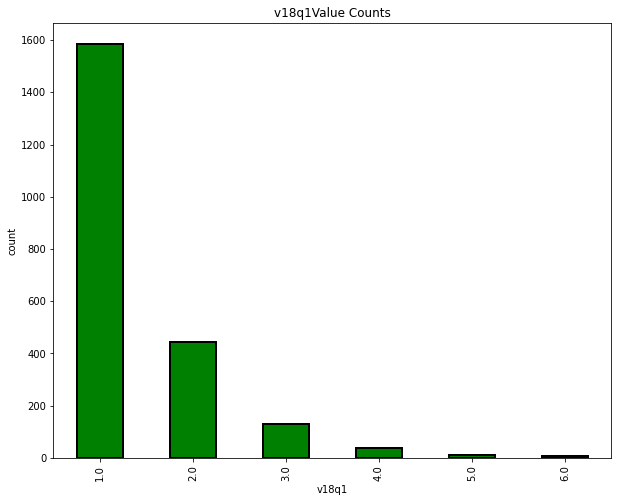

In [25]:
# lets plot the graph for more clear understanding
plt.figure(figsize=(10,8))
col='v18q1'
Train_income[col].value_counts().sort_index().plot.bar(color='green',
                                                      edgecolor='k',linewidth=2)
plt.xlabel('v18q1')
plt.ylabel('count')
plt.title(f'{col}Value Counts')
plt.show()




In [26]:
# lets replace Nan values with   0.
for df in [Train_income, Test_income]:
    df['v18q1'].fillna(value=0, inplace= True)
    

In [27]:
Train_income[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

In [28]:
Test_income[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

# lets do the same for rez_esc columns
Lets look at rez_esc (total nulls: 7928) : Years behind in school
why the null values, Lets look at few rows with nulls in rez_esc
Columns related to Years behind in school

age =Age in years
 
 
 the strongest relation is between the columns age and rez_esc

In [29]:
Train_income[Train_income['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

we can see that the minimum age is 7 years old and maximum age is 17, now we can rectify the null values and put zero values.

before filling the nan values lets find the age which is year behind the school

In [30]:
Train_income.loc[(Train_income['rez_esc'].isnull()&
                  ((Train_income['age']>7)&(Train_income['age']<17)))]['age'].describe()

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

There is one value that has Null for the 'behind in school' column with age between 7 and 17  i.e year 10.

In [31]:
Train_income[(Train_income['age']==10) &(Train_income['rez_esc'].isnull())].head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,160000.0,0,6,0,1,1,1,1.0,0,1,...,0,100,9,121,1,2.25,0.25,182.25,100,4


lets fill with zero.

In [32]:
for df in [Train_income,Test_income]:
    df['rez_esc'].fillna(0, inplace =True)
    

In [33]:
Train_income[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

In [34]:
Test_income[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

# Lets look at meaneduc (total nulls: 5) : 
average years of education for adults (18+)
why the null values, Lets look at few rows with nulls in meaneduc
Columns related to average years of education for adults (18+)

edjefe, years of education of male head of household, based on the interaction of escolari (years of education),
head of household and gender, yes=1 and no=0

edjefa, years of education of female head of household, based on the interaction of escolari (years of education),
head of household and gender, yes=1 and no=0

instlevel1, =1 no level of education

instlevel2, =1 incomplete primary

In [35]:
data=Train_income[Train_income['meaneduc'].isnull()].head()
col=['edjefa','edjefe','instlevel1','instlevel2']
data[col][data[col]['instlevel1']>0].describe()

,instlevel1,instlevel2
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [36]:
for df in [Train_income,Test_income]:
    df['meaneduc'].fillna(np.mean (df['meaneduc']),inplace= True)

In [37]:
Train_income[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

In [38]:
Test_income[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

# Lets look at SQBmeaned (total nulls: 5) :

square of the mean years of education of adults (>=18) in the household 142
why the null values, Lets look at few rows with nulls in SQBmeaned
Columns related to average years of education for adults (18+)
edjefe, years of education of male head of household, based on the interaction of escolari (years of education),
head of household and gender, yes=1 and no=0
edjefa, years of education of female head of household, based on the interaction of escolari (years of education),
head of household and gender, yes=1 and no=0
instlevel1, =1 no level of education
instlevel2, =1 incomplete primary

In [39]:
data = Train_income[Train_income['SQBmeaned'].isnull()].head()
col= ['edjefe','edjefa','instlevel1','instlevel2']
data[col][data[col]['instlevel1']>0].describe()

,instlevel1,instlevel2
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [40]:
for df in [Train_income,Test_income]:
    df['SQBmeaned'].fillna(np.mean(df['SQBmeaned']), inplace=True)

In [41]:
Train_income['SQBmeaned'].isnull().sum()

0

In [42]:
Test_income['SQBmeaned'].isnull().sum()

0

In [43]:
null_count=Train_income.select_dtypes('float64').isnull().sum()
null_count.isna().sum()

0

We finally sort the nan values for all the columns.

## Check if there are any biases in your dataset.

In [44]:
Train_income['dependency'].value_counts()

yes           2192
no            1747
0.5           1497
2              730
1.5            713
0.33333334     598
0.66666669     487
8              378
0.25           260
3              236
4              100
0.75            98
0.2             90
0.40000001      84
1.3333334       84
2.5             77
5               24
1.25            18
0.80000001      18
3.5             18
2.25            13
0.71428573      12
1.75            11
1.2             11
0.22222222      11
0.83333331      11
0.2857143        9
0.60000002       8
1.6666666        8
6                7
0.16666667       7
Name: dependency, dtype: int64

we can see that in the above column bias datasets are avaliable, let us fix this mixed datasets. 

In [45]:
Train_income['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [46]:
Train_income['edjefa'].value_counts()

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

lets replace Yes nd NO with Binary 1 and 0 respectively.

In [47]:
mapping={'yes':1,'no':0}

for df in [Train_income, Test_income]:
    df['dependency'] =df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] =df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] =df['edjefa'].replace(mapping).astype(np.float64)
    
Train_income[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


In [48]:
def map(i):
    
    if i=='yes':
        return(float(1))
    elif i=='no':
        return(float(0))
    else:
        return(float(i))

In [49]:
Train_income['dependency']=Train_income['dependency'].apply(map)
Train_income['edjefe'] =Train_income['edjefe'].apply(map)
Train_income['edjefa']=Train_income['edjefa'].apply(map)

In [50]:
Train_income['dependency']

0       0.00
1       8.00
2       8.00
3       1.00
4       1.00
        ... 
9552    0.25
9553    0.25
9554    0.25
9555    0.25
9556    0.25
Name: dependency, Length: 9557, dtype: float64

In [51]:
Train_income.edjefe

0       10.0
1       12.0
2        0.0
3       11.0
4       11.0
        ... 
9552     9.0
9553     9.0
9554     9.0
9555     9.0
9556     9.0
Name: edjefe, Length: 9557, dtype: float64

In [52]:
Train_income.edjefa

0        0.0
1        0.0
2       11.0
3        0.0
4        0.0
        ... 
9552     0.0
9553     0.0
9554     0.0
9555     0.0
9556     0.0
Name: edjefa, Length: 9557, dtype: float64

Similarly apply all for test data set :

In [53]:
Test_income.dependency

0        0.5
1        0.5
2        0.5
3        0.0
4        8.0
        ... 
23851    0.5
23852    1.0
23853    1.0
23854    1.0
23855    1.0
Name: dependency, Length: 23856, dtype: float64

In [54]:
Test_income.edjefe

0         0.0
1         0.0
2         0.0
3        16.0
4         0.0
         ... 
23851     5.0
23852     6.0
23853     6.0
23854     6.0
23855     6.0
Name: edjefe, Length: 23856, dtype: float64

In [55]:
Test_income.edjefa

0        17.0
1        17.0
2        17.0
3         0.0
4        11.0
         ... 
23851     0.0
23852     0.0
23853     0.0
23854     0.0
23855     0.0
Name: edjefa, Length: 23856, dtype: float64

## Use the chi2_contingency to predict the accurate biases between the columns,

hence according to the data we have the region popultion grows and pverty declines 
consist of following linked columns:
    v2a1 =monnthly rent payment
    
    v18q1 Columns related to number of tablets household owns v18q, owns a tablet
    r4h3 = total males head in the household 
    
    r4h3 = total females head in the household.
    r4t3 = total persons in household
    
    tamhog =size of household
    tamviv =number of persons living in household
    rez_esc = years behind in school 
    
    hhsize = household size 
    parentesco1 = 1 household head
    
    idhogar = household level identifier 
    
    hogar_total= total individual in the household.
    
    edejefa = years of education of male head of the household 
    
    edefe= years of education of female head of household
    
    meaneduc = average years of education for adults +18 
    
    instlelvel1 =  no level of education 
    
    instlevel2 = incomplete primary 
    tipoviv1 = own, and fully paid use 
    
    tipoviv2 =own . paying in installment 
    
    tipoviv3= 1 rented 
    
    tipoviv4= 1 precarious 
     tipoviv5= 1 other (assigned borrowed)
        
        area1= 1 zon urban 
        
        area2 = 2 zona rural
        
        age = age in years 
        

In [56]:
import scipy 
from scipy.stats import chi2_contingency 

In [57]:
# find the biases between v2a1(Monthly rent payment) and tipovivi1(fully paid owned house)
contingency_tab = pd.crosstab(Train_income['v2a1'],Train_income['tipovivi1'] )
contingency_tab

tipovivi1,0,1
v2a1,,
0.0,978,5911
12000.0,3,0
13000.0,4,0
14000.0,3,0
15000.0,3,0
...,...,...
770229.0,3,0
800000.0,4,0
855810.0,11,0


In [58]:
observed_values =contingency_tab.values
b =chi2_contingency(contingency_tab)
expected_values=b[3]
no_of_rows =len(contingency_tab.iloc[0:2,0])
no_of_col =len(contingency_tab.iloc[0,0:2])
df= (no_of_rows-1)*(no_of_col-1)
print("Degree of Freedom:",df)


Degree of Freedom: 1


In [59]:
from scipy.stats import chi2
chi_square =sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic =chi_square[0]+chi_square[1]
print("Chi_square_statistics", chi_square_statistic)

Chi_square_statistics 6000.61165967958


In [60]:
# check for the critical value
alpha=0.05
critical_value =chi2.ppf(q=1-alpha,df=df)
print("critical values:",critical_value)

critical values: 3.841458820694124


In [61]:
# find the p value for prediction the bias hypothesis
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print("p value",p_value)
print("significance level:",alpha)
print("degree of freedom",df)
print("chi-square statistics",chi_square_statistic)
print("critical value",critical_value)
print("P value",p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

p value 0.0
significance level: 0.05
degree of freedom 1
chi-square statistics 6000.61165967958
critical value 3.841458820694124
P value 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [62]:
# lets find the relationship between monthly rent 
#v2a1 and tipovivi3 ,tipovivi2,tipovivi4 and tipovivi5
contingency_tab=pd.crosstab(Train_income['v2a1'],Train_income['tipovivi5'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 331.6841063892792
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 331.6841063892792
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


we have seen that v2a1 and  tipovivi1,tipovivi2,tipovivi3 has a relationship which shows that it has a biased datasets.

In [63]:
 # lets find the relationship between parentesco1 = 1 household head, hogar_total= total individual in the household,
#r4h3 = total males head in the household 
#r4h3 = total females head in the household.
#r4t3 = total persons in household
#tamhog =size of household
#tamviv =number of persons living in household 

contingency_tab=pd.crosstab(Train_income['r4t3'],Train_income['parentesco1'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 1403.0430186768194
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 1403.0430186768194
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [64]:
# lets find the relationship between tablets column
#v18q1 Columns related to number of tablets household owns v18q, owns a tablet

contingency_tab=pd.crosstab(Train_income['v18q1'],Train_income['v18q'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 9557.0
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 9557.0
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [65]:
# lets find the relationship between areas column
#area1= 1 zon urban ,area2 = 2 zona rural

contingency_tab=pd.crosstab(Train_income['area1'],Train_income['area2'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 9557.0
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 9557.0
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [66]:
# lets find the relationship between years of education column
#edejefa = years of education of male head of the household 
#edefe= years of education of female head of household
#rez_esc = years behind in school 
#meaneduc = average years of education for adults +18 
#instlelvel1 =  no level of education 
#instlevel2 = incomplete primary
#age = age in years 

contingency_tab=pd.crosstab(Train_income['meaneduc'],Train_income['age'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 216.10450097295802
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 216.10450097295802
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


from above we can see that there is a strong bias relatinship between the  datasets,
hence we will be required any one of the above for predicting the accuracy of model
hence the columns we are choosing here to interprate the data accurately, are as follows:
 v2a1,v18q1,area1,edjefa,edjefe,age,meanedu,r4t3.

### lets check the variance values.

In [67]:
Train_income_var =Train_income.var()[Train_income.var()==0].index.values
Train_income_var

array(['elimbasu5'], dtype=object)

In [68]:
Train_income['elimbasu5'].var()

0.0

we have seen that the variablity of elimbasu5 is zero as all values are same therefore we can drop the column for better prediction.

In [69]:
Train_income.shape

(9557, 142)

In [70]:

Train_income =Train_income.drop('elimbasu5',axis=1)
Train_income.shape

(9557, 141)

## Check whether all the members of the house have the same poverty level.

The columns responsible for checking the members of the household have the same poverty level are:    
tamhog =size of household
tamviv =number of persons living in household
hhsize = household size 
parentesco1 = 1 household head

idhogar = household level identifier 

hogar_total= total individual in the household.

edejefa = years of education of male head of the household 

edefe= years of education of female head of household

meaneduc = average years of education for adults +18 

instlelvel1 =  no level of education 

instlevel2 = incomplete primary 
tipoviv2 =own . paying in installment 

tipoviv3= 1 rented 
    
 area1= 1 zon urban 
    
 area2 = 2 zona rural
 Target 
 
  these are the columns that can help to predict the poverty level.
       

In [71]:
all_value_equal =Train_income.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==1 )

not_equal =all_value_equal[all_value_equal!=True]
print('There are {} housholds where the family members do not have same poverty level /target'.format(len(not_equal)))

There are 85 housholds where the family members do not have same poverty level /target


## Check if there is a house without a family head.
 here we will be using parentesco1 and idhogar column 

In [72]:
household_head = Train_income.groupby('idhogar')['parentesco1'].sum().value_counts()
household_head.head()

1    2973
0      15
Name: parentesco1, dtype: int64

In [73]:
Train_income.parentesco1.value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [74]:
pd.crosstab(Train_income['edjefe'],Train_income['edjefa'])

edjefa,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
edjefe,,,,,,,,,,,,,,,,,,,,,
0.0,435,69,84,152,136,176,947,179,217,237,...,72,52,120,188,113,76,3,4,2,5
1.0,123,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,194,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,307,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,137,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,222,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,1845,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,234,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


interpretion: there are 435 household without heads as 0 males head and 0 female head.

lets find by unique function.

## Set poverty level of the members and the head of the house within a family.

In [75]:
# lets find the rows who does not own the house but pays rent 

poverty_level =Train_income[Train_income['v2a1']!=0]
poverty_level.shape

(2668, 141)

In [76]:
# let groupby the v2a1 monthly rent pyment with the area1 and area2
Poverty_level= poverty_level.groupby('area1')['v2a1'].apply(np.median)
Poverty_level

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

In [77]:
Poverty_level =poverty_level.groupby('area2')['v2a1'].apply(np.median)

In [78]:
Poverty_level

area2
0    140000.0
1     80000.0
Name: v2a1, dtype: float64

we have seen that both data has rural and urban house whose rental status is between 80000 to 140000
lets put a condition to verify the status of poverty level

In [79]:
def povert(x):
    if x<80000:
        return('Below poverty level')
    elif x>140000:
        return('Above Poverty Level')
    elif x<140000:
        return('Below poverty leve:Urban;Above Poverty Level:Rural')

In [80]:
c = poverty_level['v2a1'].apply(povert)

In [81]:
c.shape

(2668,)

In [82]:
Poverty_crosstab=pd.crosstab(c,poverty_level['area1'])
Poverty_crosstab

area1,0,1
v2a1,,
Above Poverty Level,139,1103
Below poverty leve:Urban;Above Poverty Level:Rural,98,663
Below poverty level,208,418


Interpretation:

There are total 1242 people above poverty level independent of area whether rural or Urban

Remaining are the  people level depends on their area
Rural :

Above poverty level=  139+98+208=445

Urban :

Above poverty level =1103

Below poverty level= 663+418= 1081

<AxesSubplot:title={'center':'Target vs Total_Count'}, xlabel='v2a1'>

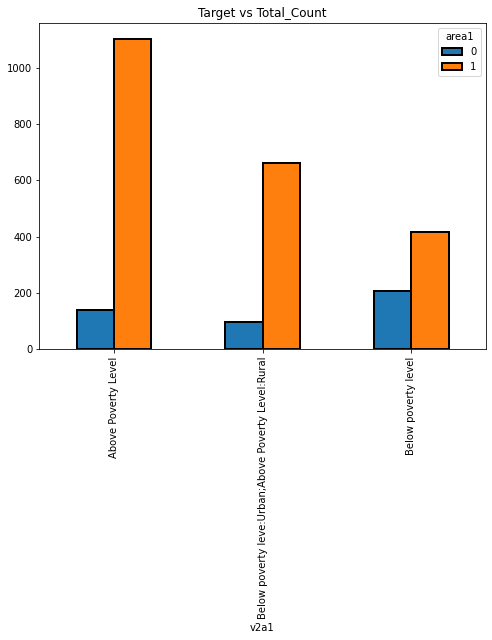

In [83]:
Poverty_crosstab.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target vs Total_Count")

# Remove the null values rows of the target values

In [84]:
Train_income['Target'].isna().sum()

0

### remove unwanted columns

In [85]:
#lets remove the unwanted column and biased columns for better prediction.
null =Train_income.select_dtypes(np.int64).columns.sort_values()
null.value_counts()

lugar5         1
parentesco2    1
escolari       1
pisonatur      1
parentesco6    1
              ..
pisoother      1
epared3        1
hogar_total    1
techocane      1
r4h2           1
Length: 129, dtype: int64

In [86]:
#lets remove the unwanted column and biased columns for better prediction.
null =Train_income.select_dtypes(np.float64).columns
null.value_counts()

SQBovercrowding    1
SQBmeaned          1
edjefa             1
overcrowding       1
SQBdependency      1
v18q1              1
meaneduc           1
edjefe             1
v2a1               1
rez_esc            1
dependency         1
dtype: int64

In [87]:
#lets remove the unwanted column and biased columns for better prediction.
null =Train_income.select_dtypes(np.object).columns
null.value_counts()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


idhogar    1
dtype: int64

# lets drop the columns that is not affecting the prediction,

here we can see idhogar is the indetity of household, 
area2 has both data of urban and rural and similarly area1 and both are biased so we can use one of these. 
similarly we can drop tipovivi4,tipovivi5,hogar_total

In [88]:
print("Before dropping the column",Train_income.shape)
col=['area2','tipovivi5','tipovivi4','hogar_total','idhogar']
Train_income= Train_income.drop(col,axis=1)
print("After dropping the columns",Train_income.shape)

Before dropping the column (9557, 141)
After dropping the columns (9557, 136)


In [89]:
# Similarly we can do for Test_income dataset
print("Before dropping the column",Test_income.shape)
col=['Id','area2','tipovivi5','tipovivi4','hogar_total','idhogar']
Test_income= Test_income.drop(col,axis=1)
print("After dropping the columns",Test_income.shape)

Before dropping the column (23856, 142)
After dropping the columns (23856, 136)


In [90]:
null_counts =Test_income.select_dtypes('int64').isnull().sum()

null_counts[null_counts>0]

Series([], dtype: int64)

In [91]:
null_counts =Test_income.select_dtypes('float64').isnull().sum()

null_counts[null_counts>0]

Series([], dtype: int64)

In [92]:
null_counts =Test_income.select_dtypes('object').isnull().sum()

null_counts[null_counts>0]

Series([], dtype: float64)

All null values has been rectified in both train_income and test_income dataframe.

# predict accuracy using random forest with cross validation

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [94]:
x = Train_income.drop('Target', axis=1)
y= Train_income.Target

In [95]:
x.shape

(9557, 135)

In [96]:
x_data_col= x.columns
x_data_col


Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=135)

In [97]:
y.shape

(9557,)

In [98]:
from sklearn.preprocessing import StandardScaler

## Apply the scaling process for better fit nd model prediction.

In [99]:
scaler =StandardScaler()

In [100]:
x= scaler.fit_transform(x)
x

array([[ 1.31338864, -0.19898579, -1.33182893, ..., -0.31175397,
        -0.02769211,  0.11787088],
       [ 0.8095477 , -0.19898579, -0.65077114, ...,  4.8036723 ,
         0.4429589 ,  1.63414851],
       [-0.42715279, -0.19898579,  2.07346003, ...,  4.8036723 ,
         0.19693678,  3.91718016],
       ...,
       [ 0.30570676, -0.19898579,  0.71134445, ..., -0.30675844,
        -0.36931521,  0.49177116],
       [ 0.30570676, -0.19898579,  0.71134445, ..., -0.30675844,
        -0.36931521, -0.55583883],
       [ 0.30570676, -0.19898579,  0.71134445, ..., -0.30675844,
        -0.36931521, -0.69081052]])

In [101]:
x_data =pd.DataFrame(x,columns=x_data_col)
x_data.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,1.313389,-0.198986,-1.331829,-0.155629,0.072521,0.210363,-0.549262,-0.466827,-0.566874,-0.539470,...,0.402406,0.335757,0.117871,-0.967066,0.592794,-0.553536,-0.544758,-0.311754,-0.027692,0.117871
1,0.809548,-0.198986,-0.650771,-0.155629,0.072521,0.210363,1.820624,0.967727,-0.566874,-0.539470,...,1.512945,0.908871,1.634149,-0.967066,1.153720,-0.553536,-0.544758,4.803672,0.442959,1.634149
2,-0.427153,-0.198986,2.073460,-0.155629,0.072521,0.210363,-0.549262,-0.466827,-0.566874,-1.504237,...,2.669756,0.609289,3.917180,-0.967066,-0.682039,-0.553536,-0.726385,4.803672,0.196937,3.917180
3,1.221781,-0.198986,0.030287,-0.155629,0.072521,0.210363,1.820624,0.967727,-0.566874,0.425297,...,-0.800678,0.088276,-0.778111,-0.167084,0.860508,0.022340,-0.356403,-0.231825,0.196937,-0.778111
4,1.221781,-0.198986,0.030287,-0.155629,0.072521,0.210363,1.820624,0.967727,-0.566874,0.425297,...,0.124771,0.609289,-0.157816,-0.167084,0.860508,0.022340,-0.356403,-0.231825,0.196937,-0.157816


# Lets Apply model prediction to train set.

In [102]:
x_train,x_test,y_train,y_test =train_test_split(x_data,y,test_size=0.3,random_state=0)

In [103]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (6689, 135)
y_train shape: (6689,)
x_test shape: (2868, 135)
y_test shape: (2868,)


## lets apply gridSerchCV to find the best parameters for prediction.

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [105]:
RFC =RandomForestClassifier(random_state=0)
parameter ={'n_estimators':[10,50,100,300], 'max_depth':[5,10,15,25]}
grid=zip([RFC],[parameter])
best_= None
for i,j in grid:
    a=GridSearchCV(i,param_grid=j,cv=3,n_jobs=1)
    a.fit(x_train,y_train)
    if best_ is None:
        best_=a 
print("Best CV score",best_.best_score_)
print("Model Parameter",best_.best_params_)
print("Best Estimators",best_.best_estimator_)

Best CV score 0.8560328218664015
Model Parameter {'max_depth': 25, 'n_estimators': 300}
Best Estimators RandomForestClassifier(max_depth=25, n_estimators=300, random_state=0)


In [106]:
RFC_1 =best_.best_estimator_
Model= RFC_1.fit(x_train,y_train)
Model

RandomForestClassifier(max_depth=25, n_estimators=300, random_state=0)

In [107]:
y_pred= RFC_1.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 2])

In [108]:
# lets check the model score 
print('Model score of the train data:{}'.format(Model.score(x_train,y_train)))
print("Model Score of the test data:{}".format(Model.score(x_test,y_test)))

Model score of the train data:1.0
Model Score of the test data:0.902370990237099


In [109]:
Accuracy= accuracy_score(y_pred,y_test)
print("Accuracy",Accuracy)

Accuracy 0.902370990237099


In [110]:
f_1_score= f1_score(y_pred,y_test,average='weighted')
print("f1Score",f_1_score)

f1Score 0.9063750271389078


In [111]:
confusion_matrix=confusion_matrix(y_pred,y_test)
print("Confusion_Matrix",confusion_matrix)

Confusion_Matrix [[ 162    7    1    1]
 [  20  398   12    4]
 [   0    6  280    6]
 [  50   80   93 1748]]


In [112]:
Important_features=pd.DataFrame(Model.feature_importances_,x_data_col,columns=['feature_importance'])
Important_features.head()

,feature_importance
v2a1,0.014516
hacdor,0.001949
rooms,0.018838
hacapo,0.001235
v14a,0.000720


In [113]:
Top50Features=Important_features.sort_values(by='feature_importance',ascending=False).head(50).index
Top50Features

Index(['SQBmeaned', 'meaneduc', 'SQBdependency', 'dependency', 'overcrowding',
       'SQBovercrowding', 'qmobilephone', 'edjefe', 'SQBedjefe',
       'SQBhogar_nin', 'hogar_nin', 'agesq', 'rooms', 'SQBage', 'age', 'r4t1',
       'edjefa', 'escolari', 'r4h2', 'r4t2', 'r4h3', 'r4m3', 'SQBescolari',
       'cielorazo', 'v2a1', 'hogar_adul', 'tamviv', 'bedrooms', 'r4m2',
       'eviv3', 'epared3', 'pisomoscer', 'r4t3', 'SQBhogar_total', 'hhsize',
       'r4m1', 'paredblolad', 'tamhog', 'r4h1', 'etecho3', 'v18q1', 'lugar1',
       'energcocinar2', 'energcocinar3', 'area1', 'television', 'v18q',
       'tipovivi1', 'paredpreb', 'epared2'],
      dtype='object')

In [114]:
for i in Top50Features:
    if i not in x_data_col:
        print(i)

In [115]:
X_data_Top50=x_data[Top50Features]
X_data_Top50

,SQBmeaned,meaneduc,SQBdependency,dependency,overcrowding,SQBovercrowding,qmobilephone,edjefe,SQBedjefe,SQBhogar_nin,...,v18q1,lugar1,energcocinar2,energcocinar3,area1,television,v18q,tipovivi1,paredpreb,epared2
0,-0.027692,0.184447,-0.311754,-0.715826,-0.738356,-0.544758,-1.228106,0.934615,0.592794,-0.553536,...,-0.466827,0.837702,-0.979390,1.086952,0.632039,-0.630742,-0.549262,-1.273275,-0.481219,1.433294
1,0.442959,0.664479,4.803672,4.265778,-0.738356,-0.544758,-1.228106,1.315840,1.153720,-0.553536,...,0.967727,0.837702,1.021044,-0.920004,0.632039,-0.630742,1.820624,-1.273275,-0.481219,1.433294
2,0.196937,0.424463,4.803672,4.265778,-1.348184,-0.726385,-1.902337,-0.971513,-0.682039,-0.553536,...,-0.466827,0.837702,1.021044,-0.920004,0.632039,-0.630742,-0.549262,0.785376,-0.481219,1.433294
3,0.196937,0.424463,-0.231825,-0.093125,-0.331804,-0.356403,0.120356,1.125228,0.860508,0.022340,...,0.967727,0.837702,1.021044,-0.920004,0.632039,-0.630742,1.820624,-1.273275,-0.481219,-0.697694
4,0.196937,0.424463,-0.231825,-0.093125,-0.331804,-0.356403,0.120356,1.125228,0.860508,0.022340,...,0.967727,0.837702,1.021044,-0.920004,0.632039,-0.630742,1.820624,-1.273275,-0.481219,-0.697694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,-0.369315,-0.235581,-0.306758,-0.560150,-0.433442,-0.408537,0.120356,0.744002,0.350576,-0.409567,...,-0.466827,-1.193742,-0.979390,1.086952,-1.582182,1.585435,-0.549262,-1.273275,-0.481219,1.433294
9553,-0.369315,-0.235581,-0.306758,-0.560150,-0.433442,-0.408537,0.120356,0.744002,0.350576,-0.409567,...,-0.466827,-1.193742,-0.979390,1.086952,-1.582182,1.585435,-0.549262,-1.273275,-0.481219,1.433294
9554,-0.369315,-0.235581,-0.306758,-0.560150,-0.433442,-0.408537,0.120356,0.744002,0.350576,-0.409567,...,-0.466827,-1.193742,-0.979390,1.086952,-1.582182,1.585435,-0.549262,-1.273275,-0.481219,1.433294
9555,-0.369315,-0.235581,-0.306758,-0.560150,-0.433442,-0.408537,0.120356,0.744002,0.350576,-0.409567,...,-0.466827,-1.193742,-0.979390,1.086952,-1.582182,1.585435,-0.549262,-1.273275,-0.481219,1.433294


In [116]:
X_train,X_test,Y_train,Y_test=train_test_split(X_data_Top50,y,test_size=0.25,random_state=0)

In [117]:
print('X train',X_train.shape)
print('Ytrain',Y_train.shape)
print('X test',X_test.shape)
print('Y test',Y_test.shape)

X train (7167, 50)
Ytrain (7167,)
X test (2390, 50)
Y test (2390,)


In [118]:
Model_1=RFC_1.fit(X_train,Y_train)

Model_1

RandomForestClassifier(max_depth=25, n_estimators=300, random_state=0)

In [119]:
pred = RFC_1.predict(X_test)
pred

array([4, 4, 4, ..., 4, 2, 1])

In [120]:
f1_score(Y_test,pred,average='weighted')

0.9199220786804884

In [121]:
accuracy_score(Y_test,pred)

0.9221757322175732

# Check the accuracy using random forest with cross validation.

In [122]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
seed=7
kfold=KFold(n_splits=5,random_state=7,shuffle=True)
print(cross_val_score(RFC_1,x,y,cv=kfold,scoring='accuracy'))
result=cross_val_score(RFC_1,x,y,cv=kfold,scoring='accuracy')
print(result*100)

[0.92259414 0.92520921 0.91941392 0.91208791 0.92150706]


In [ ]:
Test_income.drop(['tipovivi3','rez_esc','elimbasu5'],axis=1,inplace=True)

In [ ]:
test_data=Test_income[Top50Features]

In [ ]:

Test_data_1=scaler.fit_transform(test_data)
X_data_1=pd.DataFrame(Test_data_1)

In [ ]:
test_prediction=Model_1.predict(test_data)

In [ ]:
test_prediction

# Interpretation :
Above is our prediction for test data.

# Conclusion :
Using RandomForest Classifier we can predict test_data with accuracy of 90%

accuracy using random forest with cross validation 92%..
